## Agentic RAG

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


In [3]:
llm = ChatOpenAI(model = 'gpt-4o-mini')
embedding = OpenAIEmbeddings(model = 'text-embedding-3-large')

In [4]:
llm.invoke('hi')

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BklG0AxWvbnFhMRueRLG7aBIILu3p', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0daa1ec0-e9f8-42c9-a262-a6e62832d9ac-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
emb = embedding.embed_query("Hi")
len(emb)

3072

## Data Ingestion

In [6]:
url = "https://langchain-opentutorial.gitbook.io/langchain-opentutorial/17-langgraph/02-structures/06-langgraph-agentic-rag"

In [7]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [7]:
loader = WebBaseLoader(url)
data = loader.load()

In [11]:
data[0].page_content

'Agentic RAG | LangChain OpenTutorialLangChain OpenTutorialSearch...CtrlK\uf8ffü¶úÔ∏è\uf8ffüîó The LangChain Open Tutorial for Everyone01-BasicGetting Started on Windows02-Getting-Started-MacOpenAI API Key Generation and Testing GuideLangSmith Tracking SetupUsing the OpenAI API (GPT-4o Multimodal)Basic Example: Prompt+Model+OutputParserLCEL InterfaceRunnable02-PromptPrompt TemplateFew-Shot TemplatesLangChain HubPersonal Prompts for LangChainPrompt Caching03-OutputParserPydanticOutputParserPydanticOutputParserCommaSeparatedListOutputParserStructured Output ParserJsonOutputParserPandasDataFrameOutputParserDatetimeOutputParserEnumOutputParserOutput Fixing Parser04-ModelUsing Various LLM ModelsChat ModelsCachingCaching VLLMModel SerializationCheck Token UsageGoogle Generative AIHuggingface EndpointsHuggingFace LocalHuggingFace PipelineChatOllamaGPT4ALLVideo Q&A LLM (Gemini)05-MemoryConversationBufferMemoryConversationBufferWindowMemoryConversationTokenBufferMemoryConversationEntityMemoryCo

In [71]:
urls=[
    'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/',
    'https://lilianweng.github.io/posts/2023-06-23-agent/',
    'https://lilianweng.github.io/posts/2025-05-01-thinking/'
]

In [72]:
documents = [WebBaseLoader(url).load() for url in urls]
documents

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='\n\n\n\n\n\nPrompt Engineering | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\

In [73]:
doc_list = [item for sublist in documents for item in sublist]
doc_list

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='\n\n\n\n\n\nPrompt Engineering | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n

In [74]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_split = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size =100, chunk_overlap = 25)

In [75]:
doc_splits = text_split.split_documents(doc_list)

In [76]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log", 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content="Prompt Engineering | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\

In [13]:
from langchain_community.vectorstores import Chroma

In [77]:
vec_store = Chroma.from_documents(
    documents=doc_splits,
    collection_name='rag_chroma',
    embedding=embedding
)

retriever = vec_store.as_retriever()

In [78]:
retriever.invoke('what is agent and prompt')

[Document(metadata={'language': 'en', 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log"}, page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the mode

In [16]:
from langchain.tools.retriever import create_retriever_tool

In [79]:
retriever_tool = create_retriever_tool(
    retriever,
    'retriever_blog_post',
    '''
    Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. 
    Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. 
    For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.",
    '''
)

In [80]:
from langgraph.prebuilt import ToolNode, tools_condition
tools = [retriever_tool]
retriever_node=ToolNode(tools)

In [81]:
from typing import TypedDict, Annotated, List, Sequence, Literal
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
from langgraph.graph.message import add_messages
import operator

class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage], add_messages]

In [20]:
from langchain_core.prompts import PromptTemplate

In [ ]:
def LLM_Function(state: AgentState):
    print('<-- Call LLM_Function -->')
    
    message = state['messages']
  
    if len(message)>1:
        last_message = message[-1]
        question = last_message[0].content
        prompt = PromptTemplate(
            template='''You are a helpful assistant whatever question has been asked to you find out that in the given question and answer.
            Here is the question : {question}
            ''',
            input_variables=['question']
        )
        chain = prompt | llm
        response = chain.invoke({'question':question})
        return {'messages':[response]}
    else:
        llm_with_tool=llm.bind_tools(tools)
        response = llm_with_tool.invoke(message)
        return {'messages':[response]}
    

In [67]:
llm_with_tools = llm.bind_tools(tools=tools)

def LLM_Function(state: AgentState):
    print('<-- Call LLM_Function -->')
    
    message = state['messages']
    last_message = message[-1]
    question = last_message.content
    print(question)
    
    response = llm_with_tools.invoke(question)
    print(response)
    return {'messages':[response]}

In [54]:
from pydantic import BaseModel, Field
class grade(BaseModel):
    binary_score: str = Field(description="Relavance score 'yes' or 'no'")

In [55]:
def grade_documents(state: AgentState):
    print('<-- Document Grader -->')
    llm_with_structured_op=llm.with_structured_output(grade)
    prompt = PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]        
    )
    chain = prompt | llm_with_structured_op
    
    message = state['messages']
    last_message=message[-1]
    question = message[0].content
    docs = last_message.content
    
    scored_result = chain.invoke({'question':question, "context":docs})
    score=scored_result.binary_score
    
    if score =='yes':
        print(print("---Decision: Docs Are Relevant-------"))
        return 'generator'
    else:
        print('---Decision: Docs Are Not Relevant------------')
        return "rewriter"

In [56]:
from langchain import hub
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [57]:
def generate(state:AgentState):
    print('<-- Generator -->')
    
    message = state['messages']
    question = message[0].content
    last_message = message[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm
    
    response = rag_chain.invoke({'context':docs, 'question':question})
    return {'message': [response]}

In [58]:
def rewrite(state: AgentState):
    print('<-- Transform Query -->')
    
    message = state['messages']
    question = message[0].content
    input = [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]
    
    response = llm.invoke(input)
    return {'messages':[response]}

In [82]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(AgentState)
builder.add_node('LLM_Decision_Maker', LLM_Function)
builder.add_node('Vector Retriever', retriever_node)
builder.add_node('Output Generator', generate)
builder.add_node('Query Rewriter', rewrite)

builder.add_edge(START, 'LLM_Decision_Maker')
builder.add_conditional_edges(
    'LLM_Decision_Maker',
    tools_condition,
    {
        'tools': 'Vector Retriever',
        END: END
    }
)

builder.add_conditional_edges(
    'Vector Retriever',
    grade_documents,
    {
        'generator':'Output Generator',
        'rewriter' : 'Query Rewriter'
    }
)

builder.add_edge('Output Generator',END)
builder.add_edge('Query Rewriter','LLM_Decision_Maker')
app = builder.compile()

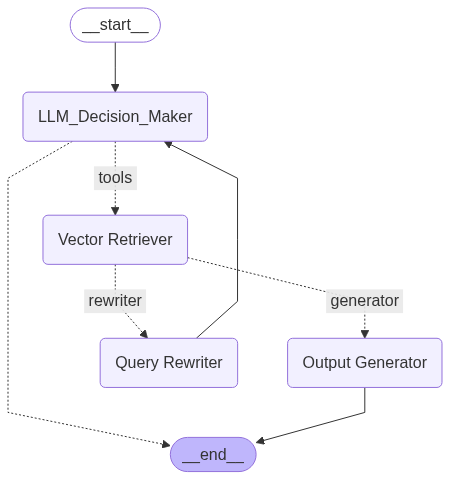

In [65]:
app

In [87]:
message = ["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]
res = app.invoke({'messages':message})

#res = app.invoke({'messages':['self-correction learning by matching model outputs for the same problem to form value-improving pairs to train a correction model']})
res

<-- Call LLM_Function -->
what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?
content='' additional_kwargs={'tool_calls': [{'id': 'call_wBWOHwU66WXdMsC39f1FGauH', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents planning and reflection"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_hDNXQB4dpH602xeeAZiWY4fu', 'function': {'arguments': '{"query": "prompt engineering agents LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 160, 'total_tokens': 221, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-Bl4vq

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='76b86b89-4b29-4fdd-8a77-f013abfcc296'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wBWOHwU66WXdMsC39f1FGauH', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents planning and reflection"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_hDNXQB4dpH602xeeAZiWY4fu', 'function': {'arguments': '{"query": "prompt engineering agents LangChain"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 160, 'total_tokens': 221, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_